In [ ]:
# Simular para los apartados a, b y c
# a) ¿qué proporción de noches a lo largo de un mes se ha retirado por quedarse sin dinero?
# b) ¿Cuál es el número de fichas con las que ha finalizado las noches de ese mes y cómo se distribuye (representar el histograma)? 
# c) ¿cuál  es  el  número  medio  de  partidas  jugadas  antes  de  retirarse  por quedarse sin dinero?
sim = SimCasino(max_partidas=50)
a, b, c = sim.simular(n_simulaciones=5000)
print(f'Apartado a)\n\tProporción días bancarrota:  {a}')
print(f'Apartado b)\n\tDistribución de fichas al final día:')
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.bar(list(range(sim.max_fichas + 35)),b, width=1, color = 'b', edgecolor='r')
# ax.set_xticks([0] + list(filter(lambda z: z, [x if y > 0 else 0 for x, y in enumerate(b)])))
plt.xlim([min(np.where(b != 0)[0]) - 1, max(np.where(b != 0)[0]) + 1])
plt.show()
print(f'Apartado c)\n\tPartidas medias antes de bancarrota:  {c}')

In [ ]:
import numpy as np
# Simular el apartado d
# Si  analizamos  el  problema  a  largo  plazo,  jugando  partidas
# indefinidamente,  y empezando con 30 fichas ¿cuál es la probabilidad de que
# me quede sin dinero? ¿y la de que termine con 150 fichas?
sim = SimCasino(n_dias=1, max_partidas=np.inf, max_fichas=150)
a, b, c = sim.simular(n_simulaciones=10000)
print(f'Probabilidad bancarrota:  {a}')
print(f'Probabilidad terminar con 150 fichas o más:  {1-a}')

In [6]:
sim = SimCasino(n_dias=1, max_partidas=np.inf, max_fichas=150, probs_jugadas=[0.23970656, 0.15061429, 0.01436985, 0.34799819, 0.0457392, 0.05833889, 0.14323302])
a, b, c = sim.simular(n_simulaciones=1000)
print(f'Probabilidad bancarrota:  {a}')
print(f'Probabilidad terminar con 150 fichas o más:  {1-a}')

Probabilidad bancarrota:  0.889
Probabilidad terminar con 150 fichas o más:  0.11099999999999999


 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     0.84912        -27.62     0.00%     0.00%     0:23:46     0:15:51

Mejores probabilidades: [0.01269477 0.22363593 0.12099939 0.30580377 0.08357057 0.16527716
 0.0880184 ]
Fichas medias: 28.42933333333333
Nº epochs 300


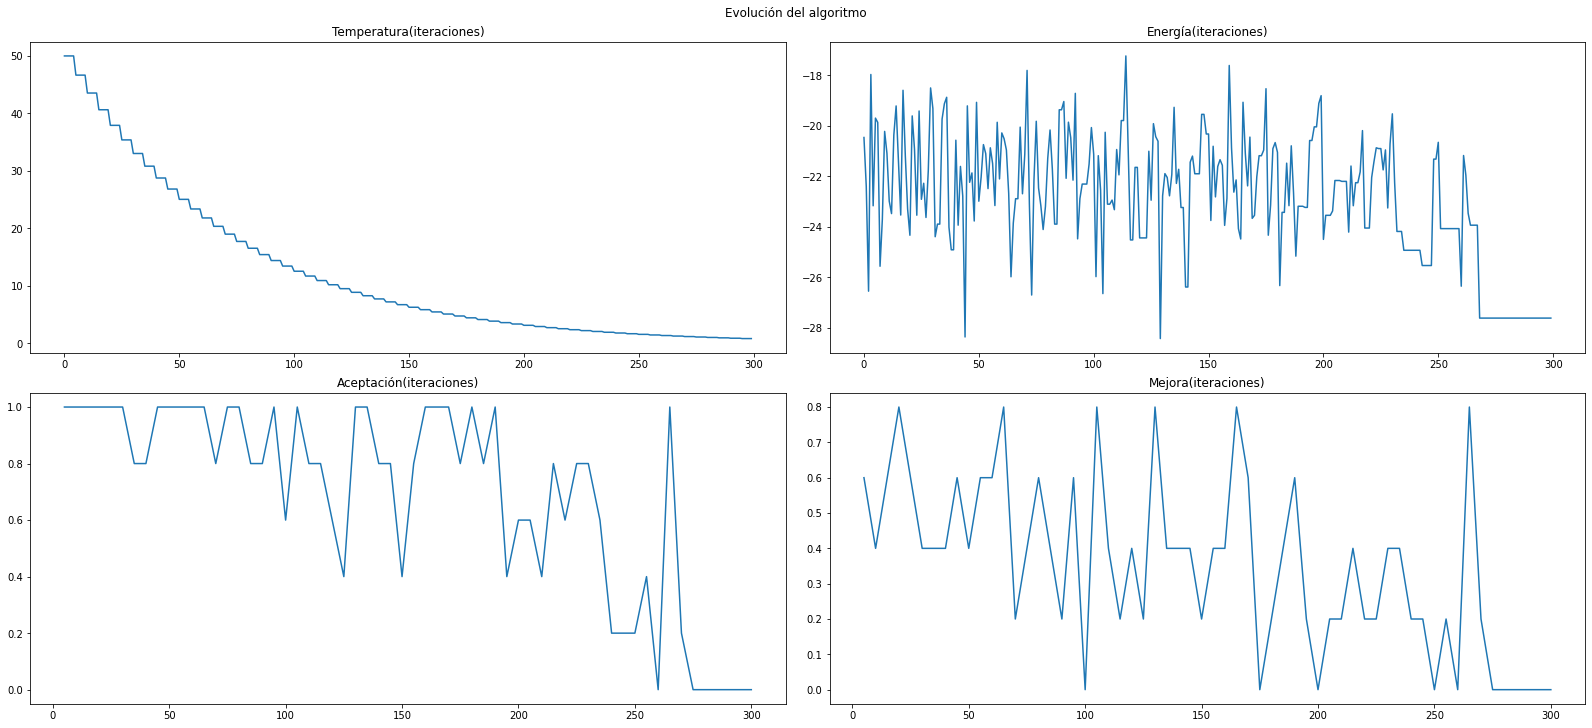

In [1]:
from casino import SimCasino, CasinoAnnealer

ann = CasinoAnnealer(n_simulaciones=750, T_config={'L': 5})
ann.Tmax = 50
ann.Tmin = 0.05
ann.steps = 500
best_sol, best_cost = ann.anneal()
print(f'Mejores probabilidades: {best_sol}')
print(f'Fichas medias: {-best_cost}')
print(f'Nº epochs {ann.epochs}')
ann.plot_evolution()

In [ ]:
from casino import SimCasino, CasinoAnnealer

casino = CasinoAnnealer(n_simulaciones=1000)
schedule = casino.auto(minutes=10)
print(schedule)